<a href="https://colab.research.google.com/github/PolyanskayaP/FMMRAZ_6sem/blob/main/Lab1_fmmraz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.	Для формирования исходных данных сгенерировать случайным образом в пространстве критериев     точек, равномерно распределенных на множестве достижимых векторных оценок, заданном системой ограничений-неравенств 

n=23

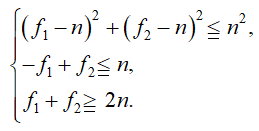

In [ ]:
from numpy.lib.nanfunctions import nancumsum
from random import uniform
import numpy as np

n=23
NACH=11.5
KON=46
KOLVO=20

def get_odz(f1):
    f2=[]
    yverh, yniz = 0, 0
    f1sq = 11.5*np.sqrt(2) + 23
    if (f1 >= 11.5) and (f1 <= 23):
        yverh=23+f1
        yniz=46-f1
    elif (f1 > 23) and (f1 <= f1sq):
        yverh=np.sqrt((23**2 - (f1-23)**2)) + 23
        yniz=46-f1
    elif (f1 > f1sq) and (f1 <= 46):
        yverh=np.sqrt((23**2 - (f1-23)**2)) + 23
        yniz= - np.sqrt((23**2 - (f1-23)**2)) + 23
    f2.append(yniz)
    f2.append(yverh)
    return(f2)

def gener_f1_f2(nach, kon, kolvo):
    f1_ar = np.random.uniform(nach, kon, kolvo)  #сгенерировали массив иксов
    f2_ar = []
    for f1 in f1_ar:
        na, ko = get_odz(f1)
        f2 = uniform(na, ko)
        f2_ar.append(f2) 
    #dictionary = dict(zip(f1_ar, f2_ar))
    return(f1_ar, f2_ar)

F1, F2 = gener_f1_f2(NACH, KON, KOLVO)
print(F1)
print(F2)

[36.09240366 14.68249818 26.55102488 23.06218299 13.27125201 38.60528147
 27.64076016 43.59388243 26.60155211 14.109057   12.13797413 27.37743766
 34.2076448  33.59203672 26.14924885 17.18617689 13.87104389 31.53104944
 36.16879463 18.32056226]
[10.841072297094339, 34.08257150955667, 38.026056053490066, 37.54603915253646, 34.25053418705659, 8.927083286708603, 39.251198696809766, 26.034643350089627, 36.66809511372237, 36.648970349159654, 33.86887257820305, 32.93040126308973, 16.042595889868338, 19.944505000692406, 20.303964515090158, 35.42571675026965, 36.60729543171303, 29.650381837490634, 24.922779619269594, 28.046024241783115]


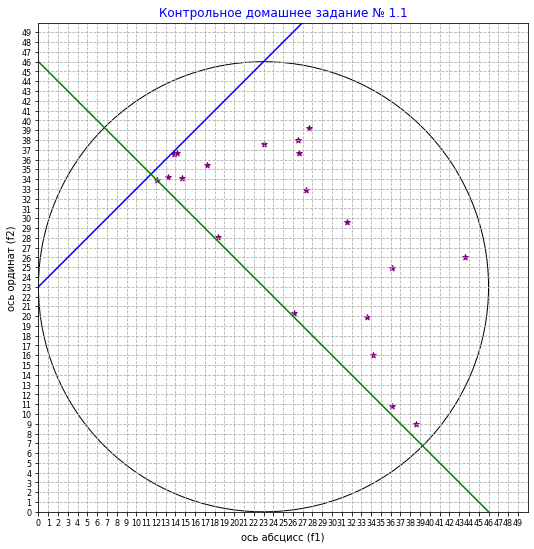

<Figure size 360x144 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=((15,9)))
ax = fig.add_subplot(111) 

f1a = np.linspace(0, 50, 100)
f2a = n + f1a

f1b = np.linspace(0, 50, 100)
f2b = 2*n - f1b 

ax.scatter(F1, F2, color = 'purple', marker = '*')  #точки

cc = plt.Circle(( 23 , 23 ), 23, color='k', fill=False ) 
ax.set_aspect(1)  #чтобы ровненько было, не вытянуто 

ax.add_artist( cc ) 

plt.xlim(-1.25,1.25)  #координатная сетка от скольки до скольки 
plt.ylim(-1.25,1.25)

plt.grid(linestyle='--')  #стиль сеточки 

plt.xticks([i for i in range(50)], size=8)
plt.yticks([i for i in range(50)], size=8)

K = plt.figure() 
K.set_figwidth(5) 
K.set_figheight(2) 

ax.set_xlim([0, 50])
ax.set_ylim([0, 50])
ax.set_title('Контрольное домашнее задание № 1.1', color = 'blue', size = 12)
ax.set_xlabel('ось абcцисc (f1)')
ax.set_ylabel('ось ординат (f2)')

ax.plot(f1a, f2a, color = 'blue')
ax.plot(f1b, f2b, color = 'green')

plt.show()

2.	Определить множество эффективных проектов с помощью алгоритма исключения заведомо неэффективных решений.

In [20]:
def pareto_mu(f1, f2, t1, t2):
    if (f1 == t1) and (f2 == t2):
        return 1
    elif (t1 <= f1) and (t2 <= f2):
        return -1
    else:
        return 0

def find_pareto(f1_ar, f2_ar, kolvo):
    tabl = []
    for f1, f2 in zip(f1_ar, f2_ar):
        inc = 0
        el = [0 for i in range(kolvo)]
        tabl.append(el)
        for t1, t2 in zip(f1_ar, f2_ar):
            if (len(tabl)==1):
                tabl[len(tabl)-1][inc] = pareto_mu(f1, f2, t1, t2) 
            elif (tabl[-2][inc] != -1):
                tabl[len(tabl)-1][inc] = pareto_mu(f1, f2, t1, t2) 
            elif (tabl[-2][inc] == -1):
                tabl[len(tabl)-1][inc] = -1
            inc = inc + 1
    Tabl = np.array(tabl)
    inc = 0
    pare1 = []
    pare2 = []
    not_pare1 = []
    not_pare2 = []
    for q in Tabl[-1]:
        if (q==-1):
            not_pare1.append(f1_ar[inc])
            not_pare2.append(f2_ar[inc])
        else:
            pare1.append(f1_ar[inc])
            pare2.append(f2_ar[inc])
        inc = inc + 1
    return(pare1, pare2, not_pare1, not_pare2)
        

PARE1, PARE2, NOT_PARE1, NOT_PARE2 = find_pareto(F1, F2, KOLVO)

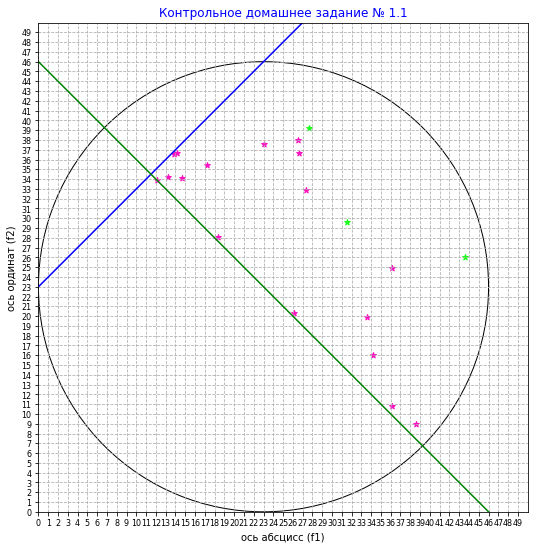

<Figure size 360x144 with 0 Axes>

In [25]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=((15,9)))
ax = fig.add_subplot(111) 

f1a = np.linspace(0, 50, 100)
f2a = n + f1a

f1b = np.linspace(0, 50, 100)
f2b = 2*n - f1b 

ax.scatter(PARE1, PARE2, color = '#19ff19', marker = '*')  #точки
ax.scatter(NOT_PARE1, NOT_PARE2, color = '#FC0FC0', marker = '*')  #точки

cc = plt.Circle(( 23 , 23 ), 23, color='k', fill=False ) 
ax.set_aspect(1)  #чтобы ровненько было, не вытянуто 

ax.add_artist( cc ) 

plt.xlim(-1.25,1.25)  #координатная сетка от скольки до скольки 
plt.ylim(-1.25,1.25)

plt.grid(linestyle='--')  #стиль сеточки 

plt.xticks([i for i in range(50)], size=8)
plt.yticks([i for i in range(50)], size=8)

K = plt.figure() 
K.set_figwidth(5) 
K.set_figheight(2) 

ax.set_xlim([0, 50])
ax.set_ylim([0, 50])
ax.set_title('Контрольное домашнее задание № 1.1', color = 'blue', size = 12)
ax.set_xlabel('ось абcцисc (f1)')
ax.set_ylabel('ось ординат (f2)')

ax.plot(f1a, f2a, color = 'blue')
ax.plot(f1b, f2b, color = 'green')

plt.show()